/Users/mackenziegray/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


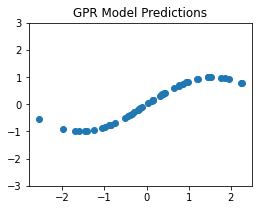

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF
import matplotlib.pyplot as plt
import numpy as np

# Random seeds
np.random.seed(seed=0)  # Set seed for NumPy
random_state = 0

# Generate features, and take norm for use with target
x = np.random.normal(loc=0, scale=1, size=(50, 1))
y = np.sin(x)

# Create kernel and define GPR
kernel = RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(x, y)

# Create test data
x_test = np.random.normal(loc=0, scale=1, size=(50, 1))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test, return_std=True)

# Initialize plot
f, ax = plt.subplots(1, 1, figsize=(4, 3))

# Squeeze data
x = np.squeeze(x)
y = np.squeeze(y)
x_test = np.squeeze(x_test)
y_test = np.squeeze(y_test)

# Plot the training data
ax.scatter(x, y)
#ax.scatter(x_test, y_test, color='red')


# Plot predictive means as blue line
#ax.plot(x_test, y_hat, 'b')

# Shade between the lower and upper confidence bounds
lower = x_test - y_sigma
upper = x_test + y_sigma
ax.fill_between(x_test, lower, upper, alpha=0.5)
ax.set_ylim([-3, 3])
plt.title("GPR Model Predictions")
plt.show()

In [3]:
x = np.random.normal(loc=0, scale=1, size=(50, 1))
y = np.sin(x)

gpr.fit(x, y)

/Users/mackenziegray/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


GaussianProcessRegressor(kernel=RBF(length_scale=1) + WhiteKernel(noise_level=1),
                         random_state=0)

In [4]:
y_sigma

array([0.00334203, 0.00326464, 0.00328832, 0.00336738, 0.00325832,
       0.00326753, 0.00325682, 0.00326019, 0.00330383, 0.00327434,
       0.0033092 , 0.00327408, 0.00333019, 0.00352809, 0.00325695,
       0.00327752, 0.00345359, 0.00327026, 0.0033436 , 0.00325694,
       0.00329885, 0.00325662, 0.00332642, 0.0033692 , 0.00326563,
       0.00331099, 0.00333859, 0.00329645, 0.00327061, 0.0032569 ,
       0.00336674, 0.00331652, 0.00327049, 0.0034081 , 0.00334953,
       0.00347703, 0.0033267 , 0.00326336, 0.0033612 , 0.00332494,
       0.00327765, 0.003327  , 0.00325741, 0.00332172, 0.00326281,
       0.00329622, 0.00325753, 0.00344731, 0.00325661, 0.00326566])

https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#rf75674b0f418-1

/Users/mackenziegray/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


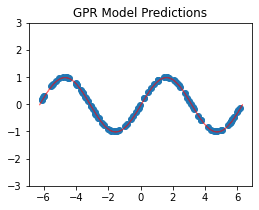

In [5]:
# Generate features, and take norm for use with target
x = np.random.uniform(-2*np.pi,2*np.pi,(100,1))
y = np.sin(x)

# Create kernel and define GPR
kernel = RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(x, y)

# Create test data
x_test = np.linspace(-2*np.pi,2*np.pi, 100).reshape(100,1)
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test, return_std=True)

# Initialize plot
f, ax = plt.subplots(1, 1, figsize=(4, 3))

# Squeeze data
x = np.squeeze(x)
y = np.squeeze(y)
x_test = np.squeeze(x_test)
y_test = np.squeeze(y_test)

# Plot the training data
ax.scatter(x, y)
#ax.scatter(x_test, y_test, color='red')


# Plot predictive means as blue line
#ax.plot(x_test, y_hat, 'b')

y_hat.reshape(100,)

# Shade between the lower and upper confidence bounds
lower = y_hat - y_sigma
upper = y_hat + y_sigma
L = []
U = []

for i in range(100):
    L.append(lower[i][i])
    U.append(upper[i][i])
ax.fill_between(x_test, L, U, alpha=0.5, color = 'red')
ax.set_ylim([-3, 3])
plt.title("GPR Model Predictions")

#ax.plot(x_test, y_hat, color="darkorange", lw=2, label="GPR (%s)" % gpr.kernel_)

plt.show()

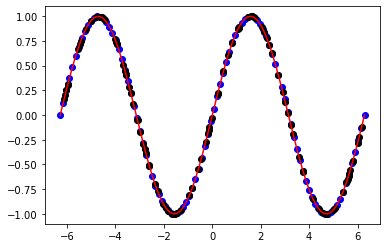

In [6]:
plt.plot(x_test, y_hat, color = 'red')
plt.scatter(x_test, y_test, color = 'blue')
plt.scatter(x, y, color = 'black')

In [7]:
for i in range(10):
    print(y_test[i], y_hat[i])

2.4492935982947064e-16 [-0.00200943]
0.12659245357374993 [0.12593356]
0.25114798718107934 [0.25122454]
0.3716624556603281 [0.37205161]
0.48619673610046876 [0.48662991]
0.5929079290546408 [0.59323546]
0.690079011482112 [0.69023825]
0.7761464642917572 [0.77613405]
0.8497254299495144 [0.84957413]
0.9096319953545186 [0.90939224]


Time for KRR fitting: 3.375
Time for GPR fitting: 0.073
Time for KRR prediction: 0.030
Time for GPR prediction: 0.033
Time for GPR prediction with standard-deviation: 0.042


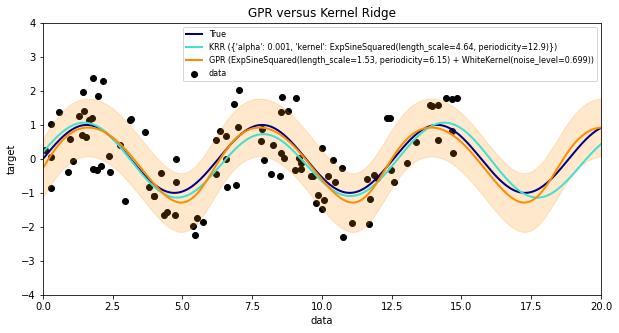

In [13]:
import time

import numpy as np

import matplotlib.pyplot as plt

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

rng = np.random.RandomState(0)

# Generate sample data
X = 15 * rng.rand(100, 1)
y = np.sin(X).ravel()
y += 3 * (0.5 - rng.rand(X.shape[0]))  # add noise

# Fit KernelRidge with parameter selection based on 5-fold cross validation
param_grid = {
    "alpha": [1e0, 1e-1, 1e-2, 1e-3],
    "kernel": [
        ExpSineSquared(l, p)
        for l in np.logspace(-2, 2, 10)
        for p in np.logspace(0, 2, 10)
    ],
}
kr = GridSearchCV(KernelRidge(), param_grid=param_grid)
stime = time.time()
kr.fit(X, y)
print("Time for KRR fitting: %.3f" % (time.time() - stime))

gp_kernel = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) + WhiteKernel(1e-1)
gpr = GaussianProcessRegressor(kernel=gp_kernel)
stime = time.time()
gpr.fit(X, y)
print("Time for GPR fitting: %.3f" % (time.time() - stime))

# Predict using kernel ridge
X_plot = np.linspace(0, 20, 10000)[:, None]
stime = time.time()
y_kr = kr.predict(X_plot)
print("Time for KRR prediction: %.3f" % (time.time() - stime))

# Predict using gaussian process regressor
stime = time.time()
y_gpr = gpr.predict(X_plot, return_std=False)
print("Time for GPR prediction: %.3f" % (time.time() - stime))

stime = time.time()
y_gpr, y_std = gpr.predict(X_plot, return_std=True)
print("Time for GPR prediction with standard-deviation: %.3f" % (time.time() - stime))

# Plot results
plt.figure(figsize=(10, 5))
lw = 2
plt.scatter(X, y, c="k", label="data")
plt.plot(X_plot, np.sin(X_plot), color="navy", lw=lw, label="True")
plt.plot(X_plot, y_kr, color="turquoise", lw=lw, label="KRR (%s)" % kr.best_params_)
plt.plot(X_plot, y_gpr, color="darkorange", lw=lw, label="GPR (%s)" % gpr.kernel_)
plt.fill_between(
    X_plot[:, 0], y_gpr - y_std, y_gpr + y_std, color="darkorange", alpha=0.2
)
plt.xlabel("data")
plt.ylabel("target")
plt.xlim(0, 20)
plt.ylim(-4, 4)
plt.title("GPR versus Kernel Ridge")
plt.legend(loc="best", scatterpoints=1, prop={"size": 8})
plt.show()

In [10]:
X_plot

array([[0.00000000e+00],
       [2.00020002e-03],
       [4.00040004e-03],
       ...,
       [1.99959996e+01],
       [1.99979998e+01],
       [2.00000000e+01]])

In [69]:
y_gpr[0:100], y_std[0:100]

(array([-0.26605204, -0.26336428, -0.2606769 , -0.25798991, -0.25530332,
        -0.25261717, -0.24993146, -0.24724622, -0.24456147, -0.24187722,
        -0.23919349, -0.23651031, -0.23382769, -0.23114565, -0.22846421,
        -0.22578339, -0.2231032 , -0.22042367, -0.21774481, -0.21506665,
        -0.2123892 , -0.20971248, -0.2070365 , -0.2043613 , -0.20168688,
        -0.19901326, -0.19634046, -0.19366851, -0.19099741, -0.18832719,
        -0.18565787, -0.18298946, -0.18032198, -0.17765545, -0.17498989,
        -0.17232531, -0.16966174, -0.16699918, -0.16433767, -0.16167721,
        -0.15901783, -0.15635955, -0.15370237, -0.15104632, -0.14839141,
        -0.14573767, -0.14308511, -0.14043375, -0.1377836 , -0.13513469,
        -0.13248702, -0.12984062, -0.12719551, -0.1245517 , -0.12190921,
        -0.11926806, -0.11662826, -0.11398983, -0.11135278, -0.10871714,
        -0.10608292, -0.10345014, -0.10081882, -0.09818897, -0.0955606 ,
        -0.09293374, -0.0903084 , -0.0876846 , -0.0

In [74]:
gpr.kernel_

ExpSineSquared(length_scale=1.53, periodicity=6.15) + WhiteKernel(noise_level=0.699)

The kernel specifying the covariance function of the GP. If None is passed, the kernel ConstantKernel(1.0, constant_value_bounds="fixed" * RBF(1.0, length_scale_bounds="fixed") is used as default. Note that the kernel hyperparameters are optimized during fitting unless the bounds are marked as “fixed”.

https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html

In [11]:
(y_gpr - y_std).shape

(10000,)

In [14]:
x = np.random.uniform(-2*np.pi,2*np.pi,(100,1))
y = np.sin(x)
x_test = np.random.uniform(-2*np.pi,2*np.pi,(100,1))

gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(x,y)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test, return_std=True)


#print(gpr.get_params)
print(gpr.log_marginal_likelihood_value_)
print(gpr.kernel_)

413.0507626486907
RBF(length_scale=2.27) + WhiteKernel(noise_level=1e-05)


/Users/mackenziegray/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


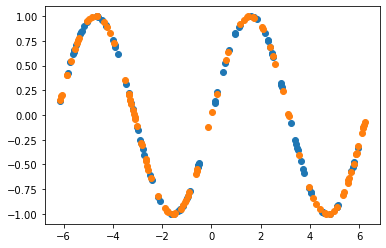

In [18]:
plt.scatter(x, y)
plt.scatter(x_test, y_hat)